This course was Funded by the European Union through the DIGIQ project (GA 101084035). Views and opinions expressed are however those of the author(s) only and do not necessarily reflect those of the European Union. Neither the European Union nor the granting authority can be held responsible for them.

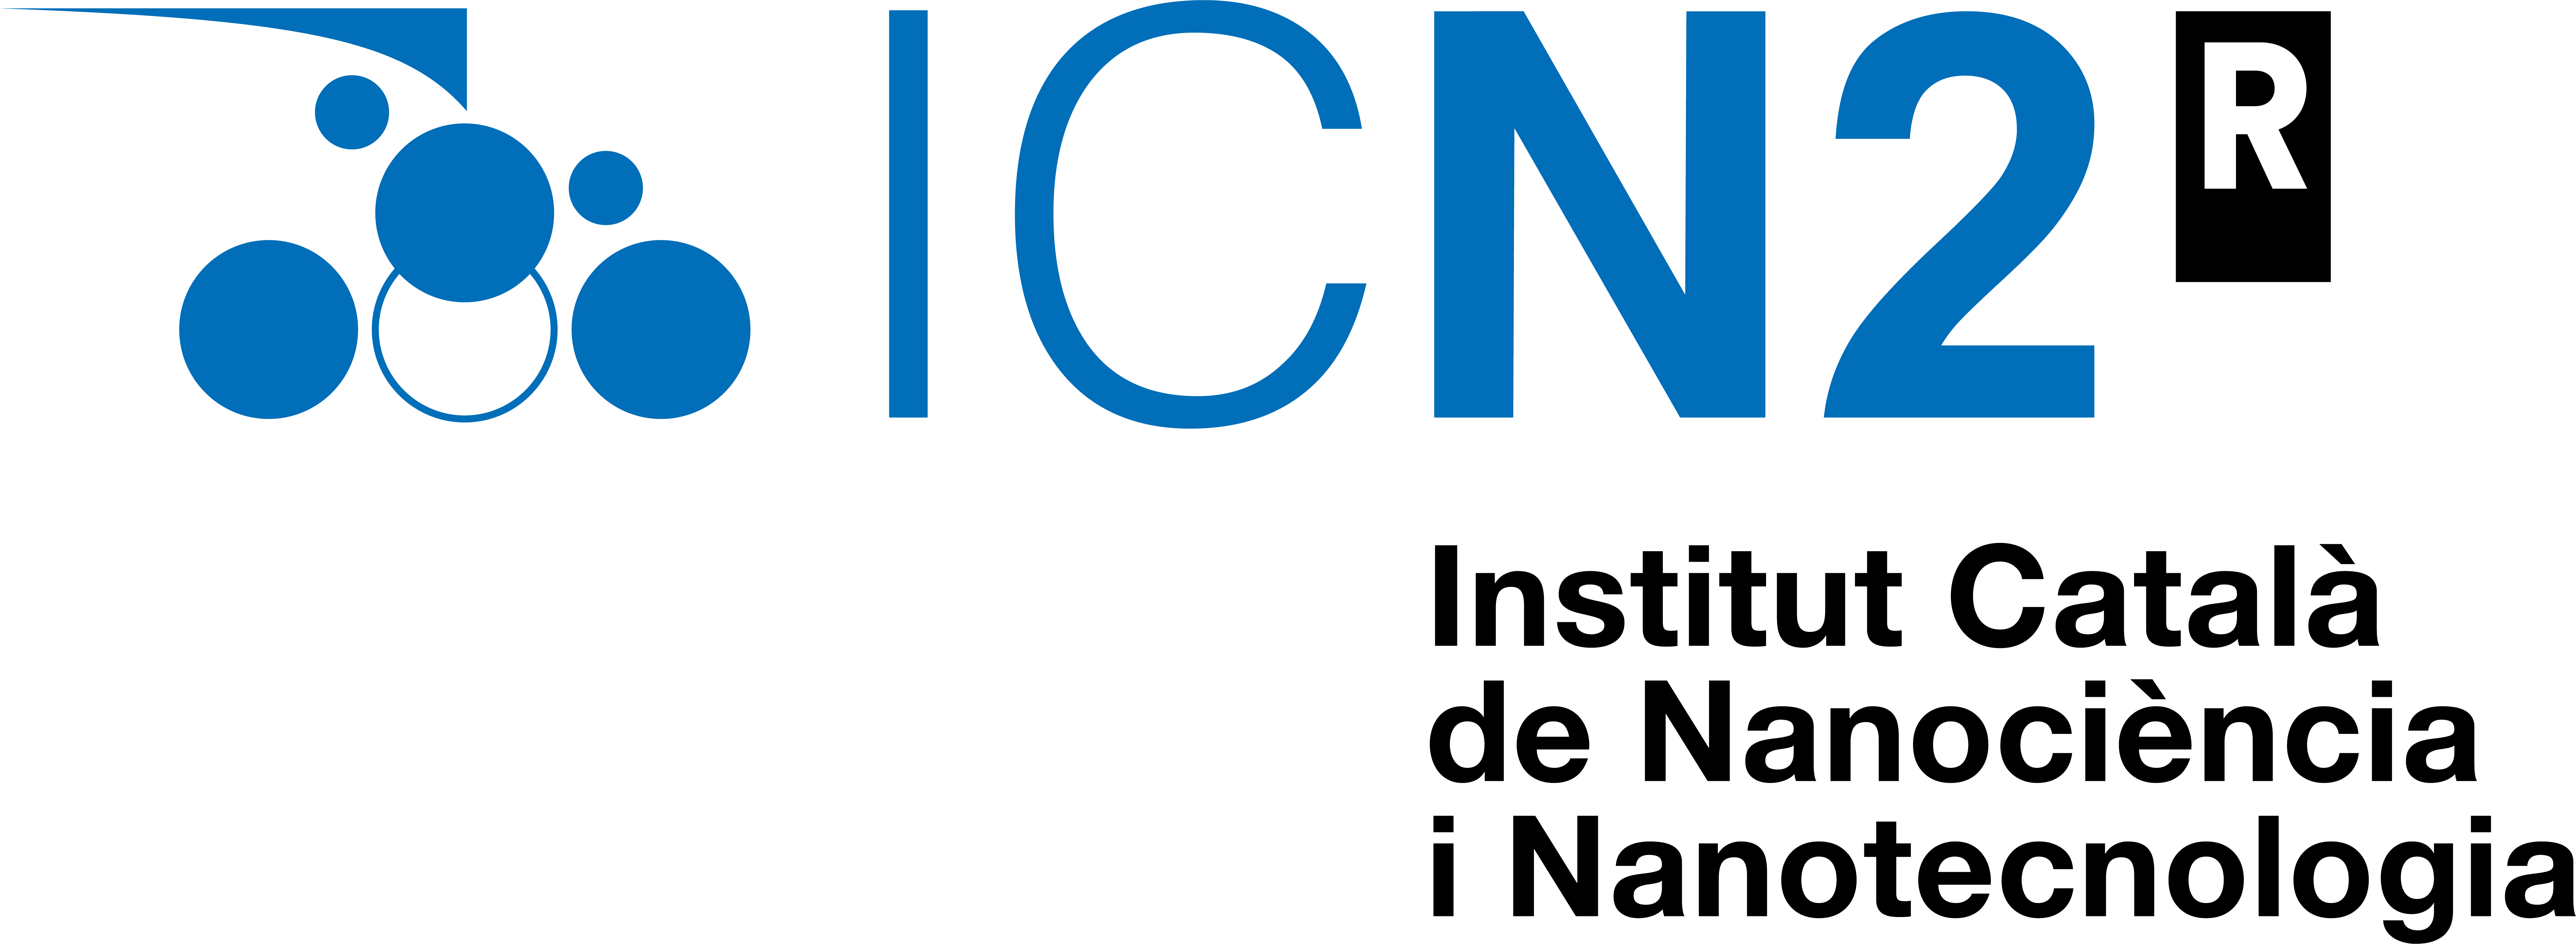

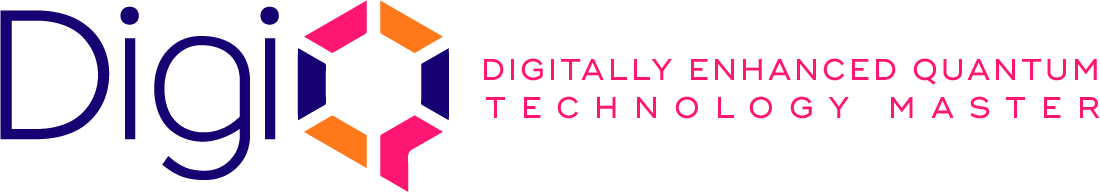

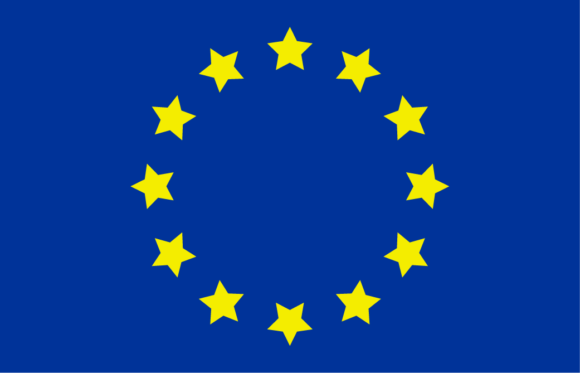


# Step 0: Python Package Installation

In [57]:
%%bash
rm -Rf topquantmat/ && git clone https://github.com/quantummasterbarcelonacode/topquantmat.git&>log
cd topquantmat
bash pull_from_conda.sh
conda install -c conda-forge ipympl -y&>log

conda is installed
All requested packages already installed.


In [58]:
from IPython.display import display, Math,Markdown #Allow to manipulate expressions and how to display them
import numpy as np  #Package for handling numerical math
import sympy as sp  #Package for handling symbolic  math
from sympy import Q #Q is a way to input constrains
from sympy import latex # Convert sympy expression into latex to render in display
from sympy import oo

#IMPORTANT
import topquantmat.tutorial as my #A package build for this session. Feel free to explore it.
import qsymm        #Package to build models using symmetries

from google.colab import output
output.enable_custom_widget_manager()

#Matplot lib is the plottong library
import matplotlib as mp
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib widget

print(my.welcome)
def my_print(message):
  display(Markdown(message))
def print_eq(suffix, eq):
  display(Markdown(suffix + r" $%s$ "%latex(eq)))

def VelOP(Psi,E, coord_syst, vars ):
  D = sp.diff;  kron_delta=my.delta;
  dim = len(E);
  V = [ sp.eye(dim),sp.eye(dim) ]
  if coord_syst=="polar":
    k,phi= vars;
    for i,x in enumerate(vars):
      for m in range(dim):
        for n in range(dim):
          V[i][m,n]= D(E[m],x)* kron_delta(m,n) + (E[m]-E[n])*my.dot( Psi[m], D(Psi[n],x) );
    V[1]=V[1]/k;
    return [sp.simplify(V[0]),sp.simplify(V[1])]

Packages are loaded. ¡Welcome!


# General Definitions

In [82]:
my_print("**Cartesian momentum**")
k_x, k_y,k_z = sp.symbols(["k_x","k_y","k_z"], real=True);
momenta= sp.Array([k_x,k_y, k_z]);

print_eq(r"$\vec{k}=$",momenta);

**Cartesian momentum**

$\vec{k}=$ $\left[\begin{matrix}k_{x} & k_{y} & k_{z}\end{matrix}\right]$ 

In [83]:
my_print("**Polar momentum**")
k     = sp.Symbol("k",positive=True);
phi   = sp.Symbol("phi",real=True);
polar =[ (  k_x,  k*sp.cos(phi) ) ,
         (  k_y,  k*sp.sin(phi) )
         ];
print_eq(r"$\vec{k}=$",[k*sp.cos(phi),k*sp.sin(phi),k_z]);

**Polar momentum**

$\vec{k}=$ $\left[ k \cos{\left(\phi \right)}, \  k \sin{\left(\phi \right)}, \  k_{z}\right]$ 

In [84]:
my_print("**Pauli matrices**")
sig0 = sp.Matrix([[1,    0],[0   , 1]]);
sigx = sp.Matrix([[0,    1],[1   , 0]]);
sigy = sp.Matrix([[0,-sp.I],[sp.I, 0]]);
sigz = sp.Matrix([[1,    0],[0   ,-1]]);
spins= [sigx,sigy,sigz];

for i,spin in zip(('x','y','z'),spins):
  print_eq(r"$\sigma_{%s}=$"%i,spin);

**Pauli matrices**

$\sigma_{x}=$ $\left[\begin{matrix}0 & 1\\1 & 0\end{matrix}\right]$ 

$\sigma_{y}=$ $\left[\begin{matrix}0 & - i\\i & 0\end{matrix}\right]$ 

$\sigma_{z}=$ $\left[\begin{matrix}1 & 0\\0 & -1\end{matrix}\right]$ 

# The Kane-Melee model

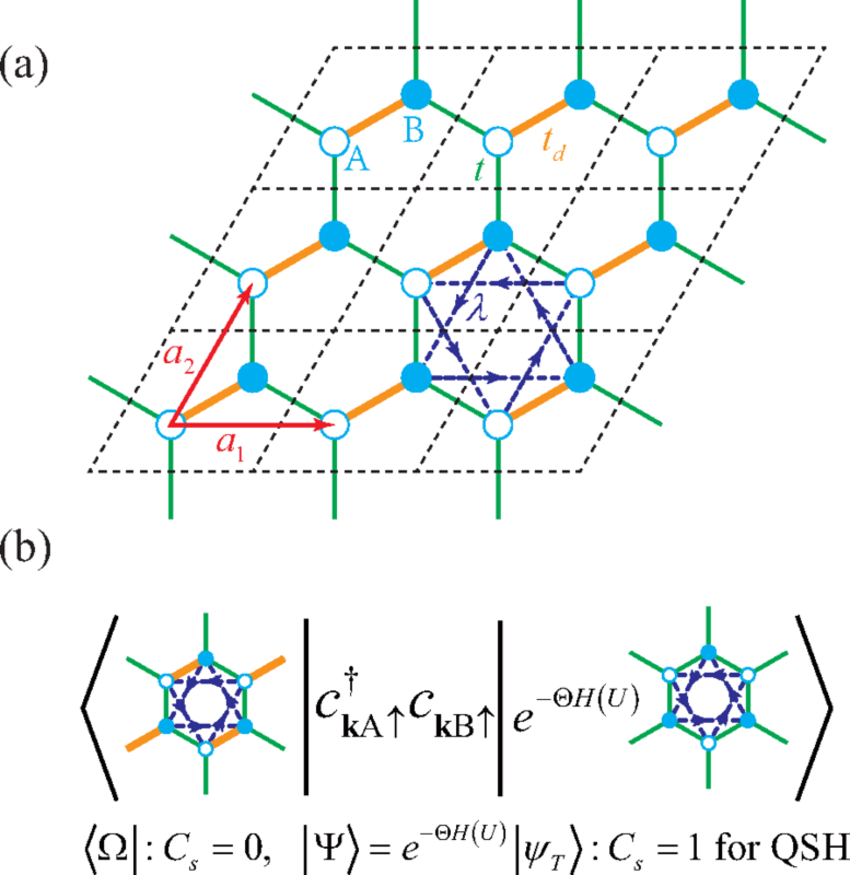

## Geometry

In [85]:
sites= ['a', 'b']
norbs=( ("a",2), ("b",2) )

my_print("**Lattice vectors**")
lat_vec= my.graphene.lat_vec;
for i,lat in enumerate(lat_vec):
  print_eq(r'$ \vec{a}_{%d}=$'%i,lat);

my_print("**Hopping vector**")
hop_v= -(lat_vec[0]+lat_vec[1])/3 ;
hopping_vectors = [ ( 'a', 'b', hop_v),( 'a', 'a', lat_vec[0]),( 'b', 'b', lat_vec[0]) ];
print_eq(r'$\vec{\delta}=$',lat);

S = qsymm.groups.spin_matrices(1/2);
Sx,Sy,Sz = S;

**Lattice vectors**

$ \vec{a}_{0}=$ $\left[\begin{matrix}\frac{1}{2} & \frac{\sqrt{3}}{2} & 0\end{matrix}\right]$ 

$ \vec{a}_{1}=$ $\left[\begin{matrix}- \frac{1}{2} & \frac{\sqrt{3}}{2} & 0\end{matrix}\right]$ 

$ \vec{a}_{2}=$ $\left[\begin{matrix}0 & 0 & 1\end{matrix}\right]$ 

**Hopping vector**

$\vec{\delta}=$ $\left[\begin{matrix}0 & 0 & 1\end{matrix}\right]$ 

### Spinorial Physics

### Rotations

In [86]:
Phi, Theta,alpha = sp.symbols("Phi Theta alpha", real=True);
my_print("The Spherical coordinates");
x= sp.cos(Phi)*sp.sin(Theta); print_eq("$\hat{x}=$",x)
y= sp.sin(Phi)*sp.sin(Theta); print_eq("$\hat{y}=$",y)
z= sp.cos(Theta);  print_eq("$\hat{z}=$",z)

su = sp.simplify(sigx*x/2 + sigy*y/2 + sigz*z/2 );
print_eq("$S_u=$",su)

The Spherical coordinates

$\hat{x}=$ $\sin{\left(\Theta \right)} \cos{\left(\Phi \right)}$ 

$\hat{y}=$ $\sin{\left(\Phi \right)} \sin{\left(\Theta \right)}$ 

$\hat{z}=$ $\cos{\left(\Theta \right)}$ 

$S_u=$ $\left[\begin{matrix}\frac{\cos{\left(\Theta \right)}}{2} & \frac{e^{- i \Phi} \sin{\left(\Theta \right)}}{2}\\\frac{e^{i \Phi} \sin{\left(\Theta \right)}}{2} & - \frac{\cos{\left(\Theta \right)}}{2}\end{matrix}\right]$ 

In [90]:
RSz = sp.simplify(sp.exp(sp.I*su*alpha).rewrite(sp.cos)  ).subs(Theta,0).subs(Phi,0);
print_eq("$R_z=$",RSz)

RSz = sp.simplify(RSz.subs(alpha,2*sp.pi/4));
print_eq("$R_z=$",RSz)

print(np.exp(-1j*np.pi/4))

qsymm.groups.spin_rotation(-2*np.pi * np.array([0,0 , 1/4]), S)

$R_z=$ $\left[\begin{matrix}i \sin{\left(\frac{\alpha}{2} \right)} + \cos{\left(\frac{\alpha}{2} \right)} & 0\\0 & e^{- \frac{i \alpha}{2}}\end{matrix}\right]$ 

$R_z=$ $\left[\begin{matrix}\frac{\sqrt{2} \cdot \left(1 + i\right)}{2} & 0\\0 & e^{- \frac{i \pi}{4}}\end{matrix}\right]$ 

(0.7071067811865476-0.7071067811865475j)


array([[0.70710678+0.70710678j, 0.        +0.j        ],
       [0.        +0.j        , 0.70710678-0.70710678j]])

### Mirrorr

In [65]:

Mx = sigx;
print_eq("The mirror in x is $M_x=$",Mx);
for idx,s in zip(("x","y","z"),(sigx,sigy,sigz)):
  print_eq(r"$ \sigma_"+idx+r"=$",Mx*s*Mx)

My = sigy;
print_eq("The mirror in y is $M_y=$",My);
for idx,s in zip(("x","y","z"),(sigx,sigy,sigz)):
  print_eq(r"$ \sigma_"+idx+r"=$",My*s*My)

Mz = sigz;
print_eq("The mirror in z is $M_x=$",Mz);
for idx,s in zip(("x","y","z"),(sigx,sigy,sigz)):
  print_eq(r"$ \sigma_"+idx+r"=$",Mz*s*Mz)


TR = sigy;
print_eq("The time-reversal symmetry is $TR=$",TR);
for idx,s in zip(("x","y","z"),(sigx,sigy,sigz)):
  print_eq(r"$ \sigma_"+idx+r"=$",TR*s.conjugate()*TR)



The mirror in x is $M_x=$ $\left[\begin{matrix}0 & 1\\1 & 0\end{matrix}\right]$ 

$ \sigma_x=$ $\left[\begin{matrix}0 & 1\\1 & 0\end{matrix}\right]$ 

$ \sigma_y=$ $\left[\begin{matrix}0 & i\\- i & 0\end{matrix}\right]$ 

$ \sigma_z=$ $\left[\begin{matrix}-1 & 0\\0 & 1\end{matrix}\right]$ 

The mirror in y is $M_y=$ $\left[\begin{matrix}0 & - i\\i & 0\end{matrix}\right]$ 

$ \sigma_x=$ $\left[\begin{matrix}0 & -1\\-1 & 0\end{matrix}\right]$ 

$ \sigma_y=$ $\left[\begin{matrix}0 & - i\\i & 0\end{matrix}\right]$ 

$ \sigma_z=$ $\left[\begin{matrix}-1 & 0\\0 & 1\end{matrix}\right]$ 

The mirror in z is $M_x=$ $\left[\begin{matrix}1 & 0\\0 & -1\end{matrix}\right]$ 

$ \sigma_x=$ $\left[\begin{matrix}0 & -1\\-1 & 0\end{matrix}\right]$ 

$ \sigma_y=$ $\left[\begin{matrix}0 & i\\- i & 0\end{matrix}\right]$ 

$ \sigma_z=$ $\left[\begin{matrix}1 & 0\\0 & -1\end{matrix}\right]$ 

The time-reversal symmetry is $TR=$ $\left[\begin{matrix}0 & - i\\i & 0\end{matrix}\right]$ 

$ \sigma_x=$ $\left[\begin{matrix}0 & -1\\-1 & 0\end{matrix}\right]$ 

$ \sigma_y=$ $\left[\begin{matrix}0 & i\\- i & 0\end{matrix}\right]$ 

$ \sigma_z=$ $\left[\begin{matrix}-1 & 0\\0 & 1\end{matrix}\right]$ 

### Our spin-pseudo spin convention (Due to QSYMM )

In [66]:
from sympy.physics.quantum import TensorProduct as kronProd
display(kronProd(sig0,sigz))#Convention
display(np.kron(sig0,Sz).astype(float))

Matrix([
[1,  0, 0,  0],
[0, -1, 0,  0],
[0,  0, 1,  0],
[0,  0, 0, -1]])

array([[ 0.5,  0. ,  0. ,  0. ],
       [ 0. , -0.5,  0. ,  0. ],
       [ 0. ,  0. ,  0.5,  0. ],
       [ 0. ,  0. ,  0. , -0.5]])

## Symmetries

In [91]:
my_print("**Rotation matrix**")
R = my.Rz(2*sp.pi/6);
U = np.kron( sigx, qsymm.groups.spin_rotation( [0, 0, 2*np.pi/6], S)).astype(complex);
C6 = qsymm.groups.PointGroupElement(R ,U=U )

my_print("**Inversion Matrix**")
U = np.kron( sigx, sig0).astype(float);
I = qsymm.groups.inversion( realspace_dim= 3, U = U );
print_eq(r'$I=$',sp.Matrix(I.R));

# Fermionic time-reversal
U = np.kron( sig0,qsymm.groups.spin_rotation(2*np.pi * np.array([0, 1/2, 0]), S)).astype(complex);
TR = qsymm.time_reversal( realspace_dim=3, U=U )

**Rotation matrix**

**Inversion Matrix**

$I=$ $\left[\begin{matrix}-1 & 0 & 0\\0 & -1 & 0\\0 & 0 & -1\end{matrix}\right]$ 

## Symmetry-based models

In [68]:
symmetries = [C6,I,TR];
epsilon_0,t_1,t_2,lambda_K = sp.symbols(["epsilon_0","t_1","t_2","lambda_K"], positive=True);
family= qsymm.bloch_family(hopping_vectors,symmetries, norbs, momenta=momenta,bloch_model=False);
print_eq("$f=$",len(family))
#gmodel =qsymm.hamiltonian_generator.hamiltonian_from_family(family, coeffs=None).subs(*my.euler);
gmodel =qsymm.hamiltonian_generator.hamiltonian_from_family(family, coeffs=[epsilon_0,t_2,lambda_K,t_1]).subs(*my.euler);

my_print("**The tight-binding model**")
print_eq("$H=$",gmodel)

$f=$ $4$ 

**The tight-binding model**

$H=$ $\left[\begin{matrix}\epsilon_{0} - i \lambda_{K} e^{\frac{i k_{x}}{2}} e^{\frac{\sqrt{3} i k_{y}}{2}} - i \lambda_{K} e^{\frac{i k_{x}}{2}} e^{- \frac{\sqrt{3} i k_{y}}{2}} + i \lambda_{K} e^{i k_{x}} - i \lambda_{K} e^{- i k_{x}} + i \lambda_{K} e^{- \frac{i k_{x}}{2}} e^{\frac{\sqrt{3} i k_{y}}{2}} + i \lambda_{K} e^{- \frac{i k_{x}}{2}} e^{- \frac{\sqrt{3} i k_{y}}{2}} + t_{2} e^{\frac{i k_{x}}{2}} e^{\frac{\sqrt{3} i k_{y}}{2}} + t_{2} e^{\frac{i k_{x}}{2}} e^{- \frac{\sqrt{3} i k_{y}}{2}} + t_{2} e^{i k_{x}} + t_{2} e^{- i k_{x}} + t_{2} e^{- \frac{i k_{x}}{2}} e^{\frac{\sqrt{3} i k_{y}}{2}} + t_{2} e^{- \frac{i k_{x}}{2}} e^{- \frac{\sqrt{3} i k_{y}}{2}} & 0 & t_{1} e^{\frac{i k_{x}}{2}} e^{\frac{\sqrt{3} i k_{y}}{6}} + t_{1} e^{- \frac{\sqrt{3} i k_{y}}{3}} + t_{1} e^{- \frac{i k_{x}}{2}} e^{\frac{\sqrt{3} i k_{y}}{6}} & 0\\0 & \epsilon_{0} + i \lambda_{K} e^{\frac{i k_{x}}{2}} e^{\frac{\sqrt{3} i k_{y}}{2}} + i \lambda_{K} e^{\frac{i k_{x}}{2}} e^{- \frac{\sqrt{3} i k_{y}}{2}} - i \lambda_{K} e^{i k_{x}} + i \lambda_{K} e^{- i k_{x}} - i \lambda_{K} e^{- \frac{i k_{x}}{2}} e^{\frac{\sqrt{3} i k_{y}}{2}} - i \lambda_{K} e^{- \frac{i k_{x}}{2}} e^{- \frac{\sqrt{3} i k_{y}}{2}} + t_{2} e^{\frac{i k_{x}}{2}} e^{\frac{\sqrt{3} i k_{y}}{2}} + t_{2} e^{\frac{i k_{x}}{2}} e^{- \frac{\sqrt{3} i k_{y}}{2}} + t_{2} e^{i k_{x}} + t_{2} e^{- i k_{x}} + t_{2} e^{- \frac{i k_{x}}{2}} e^{\frac{\sqrt{3} i k_{y}}{2}} + t_{2} e^{- \frac{i k_{x}}{2}} e^{- \frac{\sqrt{3} i k_{y}}{2}} & 0 & t_{1} e^{\frac{i k_{x}}{2}} e^{\frac{\sqrt{3} i k_{y}}{6}} + t_{1} e^{- \frac{\sqrt{3} i k_{y}}{3}} + t_{1} e^{- \frac{i k_{x}}{2}} e^{\frac{\sqrt{3} i k_{y}}{6}}\\t_{1} e^{\frac{i k_{x}}{2}} e^{- \frac{\sqrt{3} i k_{y}}{6}} + t_{1} e^{\frac{\sqrt{3} i k_{y}}{3}} + t_{1} e^{- \frac{i k_{x}}{2}} e^{- \frac{\sqrt{3} i k_{y}}{6}} & 0 & \epsilon_{0} + i \lambda_{K} e^{\frac{i k_{x}}{2}} e^{\frac{\sqrt{3} i k_{y}}{2}} + i \lambda_{K} e^{\frac{i k_{x}}{2}} e^{- \frac{\sqrt{3} i k_{y}}{2}} - i \lambda_{K} e^{i k_{x}} + i \lambda_{K} e^{- i k_{x}} - i \lambda_{K} e^{- \frac{i k_{x}}{2}} e^{\frac{\sqrt{3} i k_{y}}{2}} - i \lambda_{K} e^{- \frac{i k_{x}}{2}} e^{- \frac{\sqrt{3} i k_{y}}{2}} + t_{2} e^{\frac{i k_{x}}{2}} e^{\frac{\sqrt{3} i k_{y}}{2}} + t_{2} e^{\frac{i k_{x}}{2}} e^{- \frac{\sqrt{3} i k_{y}}{2}} + t_{2} e^{i k_{x}} + t_{2} e^{- i k_{x}} + t_{2} e^{- \frac{i k_{x}}{2}} e^{\frac{\sqrt{3} i k_{y}}{2}} + t_{2} e^{- \frac{i k_{x}}{2}} e^{- \frac{\sqrt{3} i k_{y}}{2}} & 0\\0 & t_{1} e^{\frac{i k_{x}}{2}} e^{- \frac{\sqrt{3} i k_{y}}{6}} + t_{1} e^{\frac{\sqrt{3} i k_{y}}{3}} + t_{1} e^{- \frac{i k_{x}}{2}} e^{- \frac{\sqrt{3} i k_{y}}{6}} & 0 & \epsilon_{0} - i \lambda_{K} e^{\frac{i k_{x}}{2}} e^{\frac{\sqrt{3} i k_{y}}{2}} - i \lambda_{K} e^{\frac{i k_{x}}{2}} e^{- \frac{\sqrt{3} i k_{y}}{2}} + i \lambda_{K} e^{i k_{x}} - i \lambda_{K} e^{- i k_{x}} + i \lambda_{K} e^{- \frac{i k_{x}}{2}} e^{\frac{\sqrt{3} i k_{y}}{2}} + i \lambda_{K} e^{- \frac{i k_{x}}{2}} e^{- \frac{\sqrt{3} i k_{y}}{2}} + t_{2} e^{\frac{i k_{x}}{2}} e^{\frac{\sqrt{3} i k_{y}}{2}} + t_{2} e^{\frac{i k_{x}}{2}} e^{- \frac{\sqrt{3} i k_{y}}{2}} + t_{2} e^{i k_{x}} + t_{2} e^{- i k_{x}} + t_{2} e^{- \frac{i k_{x}}{2}} e^{\frac{\sqrt{3} i k_{y}}{2}} + t_{2} e^{- \frac{i k_{x}}{2}} e^{- \frac{\sqrt{3} i k_{y}}{2}}\end{matrix}\right]$ 

## The dispersion Relation

In [69]:
my_print(r" Replace $\varepsilon_0\rightarrow 0$ and Replace $t_2\rightarrow 0$")
H = gmodel.subs(epsilon_0,0).subs(t_2,0);

Es= H.eigenvals();
Es= [ k for k in Es.keys() for i in range(Es[k]) ]
Es= [ sp.trigsimp(E_k.rewrite(sp.cos)) for E_k in Es ];

for i,E_k in enumerate(Es):
  suffix = r"$E_{%d}(\vec{k})=$"%i
  print_eq( suffix,E_k)

 Replace $\varepsilon_0\rightarrow 0$ and Replace $t_2\rightarrow 0$

$E_{0}(\vec{k})=$ $- \sqrt{4 \lambda_{K}^{2} \sin^{2}{\left(k_{x} \right)} - 8 \lambda_{K}^{2} \cos{\left(\frac{k_{x}}{2} \right)} \cos{\left(\frac{\sqrt{3} k_{y}}{2} \right)} - 4 \lambda_{K}^{2} \cos{\left(k_{x} \right)} \cos{\left(\sqrt{3} k_{y} \right)} - 4 \lambda_{K}^{2} \cos{\left(k_{x} \right)} + 8 \lambda_{K}^{2} \cos{\left(\frac{3 k_{x}}{2} \right)} \cos{\left(\frac{\sqrt{3} k_{y}}{2} \right)} + 4 \lambda_{K}^{2} \cos{\left(\sqrt{3} k_{y} \right)} + 4 \lambda_{K}^{2} + 4 t_{1}^{2} \cos{\left(\frac{k_{x}}{2} \right)} \cos{\left(\frac{\sqrt{3} k_{y}}{2} \right)} + 2 t_{1}^{2} \cos{\left(k_{x} \right)} + 3 t_{1}^{2}}$ 

$E_{1}(\vec{k})=$ $- \sqrt{4 \lambda_{K}^{2} \sin^{2}{\left(k_{x} \right)} - 8 \lambda_{K}^{2} \cos{\left(\frac{k_{x}}{2} \right)} \cos{\left(\frac{\sqrt{3} k_{y}}{2} \right)} - 4 \lambda_{K}^{2} \cos{\left(k_{x} \right)} \cos{\left(\sqrt{3} k_{y} \right)} - 4 \lambda_{K}^{2} \cos{\left(k_{x} \right)} + 8 \lambda_{K}^{2} \cos{\left(\frac{3 k_{x}}{2} \right)} \cos{\left(\frac{\sqrt{3} k_{y}}{2} \right)} + 4 \lambda_{K}^{2} \cos{\left(\sqrt{3} k_{y} \right)} + 4 \lambda_{K}^{2} + 4 t_{1}^{2} \cos{\left(\frac{k_{x}}{2} \right)} \cos{\left(\frac{\sqrt{3} k_{y}}{2} \right)} + 2 t_{1}^{2} \cos{\left(k_{x} \right)} + 3 t_{1}^{2}}$ 

$E_{2}(\vec{k})=$ $\sqrt{4 \lambda_{K}^{2} \sin^{2}{\left(k_{x} \right)} - 8 \lambda_{K}^{2} \cos{\left(\frac{k_{x}}{2} \right)} \cos{\left(\frac{\sqrt{3} k_{y}}{2} \right)} - 4 \lambda_{K}^{2} \cos{\left(k_{x} \right)} \cos{\left(\sqrt{3} k_{y} \right)} - 4 \lambda_{K}^{2} \cos{\left(k_{x} \right)} + 8 \lambda_{K}^{2} \cos{\left(\frac{3 k_{x}}{2} \right)} \cos{\left(\frac{\sqrt{3} k_{y}}{2} \right)} + 4 \lambda_{K}^{2} \cos{\left(\sqrt{3} k_{y} \right)} + 4 \lambda_{K}^{2} + 4 t_{1}^{2} \cos{\left(\frac{k_{x}}{2} \right)} \cos{\left(\frac{\sqrt{3} k_{y}}{2} \right)} + 2 t_{1}^{2} \cos{\left(k_{x} \right)} + 3 t_{1}^{2}}$ 

$E_{3}(\vec{k})=$ $\sqrt{4 \lambda_{K}^{2} \sin^{2}{\left(k_{x} \right)} - 8 \lambda_{K}^{2} \cos{\left(\frac{k_{x}}{2} \right)} \cos{\left(\frac{\sqrt{3} k_{y}}{2} \right)} - 4 \lambda_{K}^{2} \cos{\left(k_{x} \right)} \cos{\left(\sqrt{3} k_{y} \right)} - 4 \lambda_{K}^{2} \cos{\left(k_{x} \right)} + 8 \lambda_{K}^{2} \cos{\left(\frac{3 k_{x}}{2} \right)} \cos{\left(\frac{\sqrt{3} k_{y}}{2} \right)} + 4 \lambda_{K}^{2} \cos{\left(\sqrt{3} k_{y} \right)} + 4 \lambda_{K}^{2} + 4 t_{1}^{2} \cos{\left(\frac{k_{x}}{2} \right)} \cos{\left(\frac{\sqrt{3} k_{y}}{2} \right)} + 2 t_{1}^{2} \cos{\left(k_{x} \right)} + 3 t_{1}^{2}}$ 

## The low-energy $(\vec{k}\cdot\vec{p})$ Hamiltonian

In [70]:
my_print(r"Replace $t\rightarrow 2v/\sqrt{3} $ and \lambda_H \rightarrow \Delta/3\sqrt{3}")
v, Delta= sp.symbols("v Delta", positive=True);
H = H.subs(t_1,2*v/sp.sqrt(3)).subs(lambda_K,Delta/sp.sqrt(3)/3);

my_print(r"**Low energy Hamiltonians**")
for sK, K in zip( (r"$\vec{K}_0$",r"$\vec{K}_1$"),
                  (my.graphene.K0,my.graphene.K1)):
  kpH = my.FirstOrderTaylor( H, x=momenta, x0=K  );
  print_eq(sK+"=", sp.Array(K) )
  print_eq(r"$H(\vec{k})=$", kpH );

Replace $t\rightarrow 2v/\sqrt{3} $ and \lambda_H \rightarrow \Delta/3\sqrt{3}

**Low energy Hamiltonians**

$\vec{K}_0$= $\left[\begin{matrix}\frac{4 \pi}{3} & 0 & 0\end{matrix}\right]$ 

$H(\vec{k})=$ $\left[\begin{matrix}\Delta & 0 & v \left(- k_{x} - i k_{y}\right) & 0\\0 & - \Delta & 0 & v \left(- k_{x} - i k_{y}\right)\\v \left(- k_{x} + i k_{y}\right) & 0 & - \Delta & 0\\0 & v \left(- k_{x} + i k_{y}\right) & 0 & \Delta\end{matrix}\right]$ 

$\vec{K}_1$= $\left[\begin{matrix}- \frac{4 \pi}{3} & 0 & 0\end{matrix}\right]$ 

$H(\vec{k})=$ $\left[\begin{matrix}- \Delta & 0 & v \left(k_{x} - i k_{y}\right) & 0\\0 & \Delta & 0 & v \left(k_{x} - i k_{y}\right)\\v \left(k_{x} + i k_{y}\right) & 0 & \Delta & 0\\0 & v \left(k_{x} + i k_{y}\right) & 0 & - \Delta\end{matrix}\right]$ 

We will define the foolowing variables: \\
$r_k = \sqrt{ \Delta^2 + k^2 v^2}$ \\
$\cos \theta_k = \Delta/r_k$ \\
$\sin \theta_k = kv/r_k$ \\
$\theta_k \in (0,\pi/2],\quad r_k>0$

In [93]:
r_k, theta_k = sp.symbols(["r_k","theta_k"],positive=True);

expr_rK = sp.sqrt(Delta**2+k**2*v**2);
conv_polar = [( expr_rK , r_k ),
              ( k*v     , r_k*sp.sin(theta_k) ),
              ( Delta   , r_k*sp.cos(theta_k) ),
              ];
conv_cart  = [( r_k, expr_rK ),
              ( sp.sin(theta_k), k*v/expr_rK ),
              ( sp.cos(theta_k), Delta/expr_rK ),
              ( sp.sin(theta_k/2), (1/sp.sqrt(2))*sp.sqrt(1-Delta/expr_rK) ),
              ( sp.cos(theta_k/2), (1/sp.sqrt(2))*sp.sqrt(1+Delta/expr_rK) ),
              ];

In [94]:
my_print("Computing the eigenvectors in polar coordinates")
kpH = my.FirstOrderTaylor( H, x=momenta, x0=my.graphene.K0  );
E,Psi_orig = my.EigenSystem(kpH,coord_syst=polar);
for i,x in enumerate(Psi_orig):
  Psi = r"$\Psi_%d(k,\phi)$="%i;
  print_eq(Psi, x.T)

my_print("Replace some variables for convenience")
Psi_vpol = [ my.half_angles( x.subs(conv_polar), theta_k) for x in Psi_orig];
for i,x in enumerate(Psi_vpol):
  expr1= sp.I * sp.sin(phi)- sp.cos(phi);
  expr2=-sp.exp(-sp.I*phi);
  Psi = r"$\Psi_%d(k,\phi)$="%i;
  x  = sp.simplify(x).subs(expr1,expr2);
  print_eq(Psi, x.T)

Computing the eigenvectors in polar coordinates

$\Psi_0(k,\phi)$= $\left[\begin{matrix}\frac{\left(- \Delta + \sqrt{\Delta^{2} + k^{2} v^{2}}\right) e^{i \phi}}{\sqrt{k^{2} v^{2} + \left(\Delta - \sqrt{\Delta^{2} + k^{2} v^{2}}\right)^{2}}} & 0 & \frac{k v}{\sqrt{k^{2} v^{2} + \left(\Delta - \sqrt{\Delta^{2} + k^{2} v^{2}}\right)^{2}}} & 0\end{matrix}\right]$ 

$\Psi_1(k,\phi)$= $\left[\begin{matrix}0 & \frac{\left(\Delta + \sqrt{\Delta^{2} + k^{2} v^{2}}\right) e^{i \phi}}{\sqrt{k^{2} v^{2} + \left(\Delta + \sqrt{\Delta^{2} + k^{2} v^{2}}\right)^{2}}} & 0 & \frac{k v}{\sqrt{k^{2} v^{2} + \left(\Delta + \sqrt{\Delta^{2} + k^{2} v^{2}}\right)^{2}}}\end{matrix}\right]$ 

$\Psi_2(k,\phi)$= $\left[\begin{matrix}\frac{\left(- \Delta - \sqrt{\Delta^{2} + k^{2} v^{2}}\right) e^{i \phi}}{\sqrt{k^{2} v^{2} + \left(\Delta + \sqrt{\Delta^{2} + k^{2} v^{2}}\right)^{2}}} & 0 & \frac{k v}{\sqrt{k^{2} v^{2} + \left(\Delta + \sqrt{\Delta^{2} + k^{2} v^{2}}\right)^{2}}} & 0\end{matrix}\right]$ 

$\Psi_3(k,\phi)$= $\left[\begin{matrix}0 & \frac{\left(\Delta - \sqrt{\Delta^{2} + k^{2} v^{2}}\right) e^{i \phi}}{\sqrt{k^{2} v^{2} + \left(\Delta - \sqrt{\Delta^{2} + k^{2} v^{2}}\right)^{2}}} & 0 & \frac{k v}{\sqrt{k^{2} v^{2} + \left(\Delta - \sqrt{\Delta^{2} + k^{2} v^{2}}\right)^{2}}}\end{matrix}\right]$ 

Replace some variables for convenience

$\Psi_0(k,\phi)$= $\left[\begin{matrix}e^{i \phi} \sin{\left(\frac{\theta_{k}}{2} \right)} & 0 & \cos{\left(\frac{\theta_{k}}{2} \right)} & 0\end{matrix}\right]$ 

$\Psi_1(k,\phi)$= $\left[\begin{matrix}0 & e^{i \phi} \cos{\left(\frac{\theta_{k}}{2} \right)} & 0 & \sin{\left(\frac{\theta_{k}}{2} \right)}\end{matrix}\right]$ 

$\Psi_2(k,\phi)$= $\left[\begin{matrix}- e^{i \phi} \cos{\left(\frac{\theta_{k}}{2} \right)} & 0 & \sin{\left(\frac{\theta_{k}}{2} \right)} & 0\end{matrix}\right]$ 

$\Psi_3(k,\phi)$= $\left[\begin{matrix}0 & - e^{i \phi} \sin{\left(\frac{\theta_{k}}{2} \right)} & 0 & \cos{\left(\frac{\theta_{k}}{2} \right)}\end{matrix}\right]$ 

## The Berry Curvature

In [95]:
my_print("**Let us invert the k-dependent variables**")
Psi_vcar = [ my.exps2trig(sp.simplify(x.subs(conv_cart))) for x in Psi_vpol ];
for i,x in enumerate(Psi_vcar):
  psi = r"$\Psi_%d(k,\phi)$="%i;
  print_eq(psi, x.T)

my_print("**Compute the velocity in polar coordinates**")
v_k,v_phi = VelOP(Psi_vcar,E, "polar", [k,phi] );
v_k  = my.half_angles(sp.simplify(v_k.subs(conv_polar)), theta_k);
v_phi= my.half_angles(sp.simplify(v_phi.subs(conv_polar)),theta_k).subs(conv_cart);
for sv,vv in zip( (r"$V_k$",r"$V_\phi$"), (v_k,v_phi) ):
  print_eq(sv+"=",vv)

my_print("**Compute the velocity in cartesian coordinates**")
v_x =sp.simplify( v_k*sp.cos(phi)+ v_phi*sp.sin(phi) );
v_y =sp.simplify(-v_k*sp.sin(phi)+ v_phi*sp.cos(phi) );
for sv,vv in zip( (r"$V_x$",r"$V_y$"), (v_x,v_y) ):
  print_eq(sv+"=",sp.simplify(vv))

**Let us invert the k-dependent variables**

$\Psi_0(k,\phi)$= $\left[\begin{matrix}\frac{\sqrt{- 2 \Delta + 2 \sqrt{\Delta^{2} + k^{2} v^{2}}} \left(i \sin{\left(\phi \right)} + \cos{\left(\phi \right)}\right)}{2 \sqrt[4]{\Delta^{2} + k^{2} v^{2}}} & 0 & \frac{\sqrt{2 \Delta + 2 \sqrt{\Delta^{2} + k^{2} v^{2}}}}{2 \sqrt[4]{\Delta^{2} + k^{2} v^{2}}} & 0\end{matrix}\right]$ 

$\Psi_1(k,\phi)$= $\left[\begin{matrix}0 & \frac{\sqrt{2 \Delta + 2 \sqrt{\Delta^{2} + k^{2} v^{2}}} \left(i \sin{\left(\phi \right)} + \cos{\left(\phi \right)}\right)}{2 \sqrt[4]{\Delta^{2} + k^{2} v^{2}}} & 0 & \frac{\sqrt{- 2 \Delta + 2 \sqrt{\Delta^{2} + k^{2} v^{2}}}}{2 \sqrt[4]{\Delta^{2} + k^{2} v^{2}}}\end{matrix}\right]$ 

$\Psi_2(k,\phi)$= $\left[\begin{matrix}- \frac{\sqrt{2 \Delta + 2 \sqrt{\Delta^{2} + k^{2} v^{2}}} \left(i \sin{\left(\phi \right)} + \cos{\left(\phi \right)}\right)}{2 \sqrt[4]{\Delta^{2} + k^{2} v^{2}}} & 0 & \frac{\sqrt{- 2 \Delta + 2 \sqrt{\Delta^{2} + k^{2} v^{2}}}}{2 \sqrt[4]{\Delta^{2} + k^{2} v^{2}}} & 0\end{matrix}\right]$ 

$\Psi_3(k,\phi)$= $\left[\begin{matrix}0 & - \frac{\sqrt{- 2 \Delta + 2 \sqrt{\Delta^{2} + k^{2} v^{2}}} \left(i \sin{\left(\phi \right)} + \cos{\left(\phi \right)}\right)}{2 \sqrt[4]{\Delta^{2} + k^{2} v^{2}}} & 0 & \frac{\sqrt{2 \Delta + 2 \sqrt{\Delta^{2} + k^{2} v^{2}}}}{2 \sqrt[4]{\Delta^{2} + k^{2} v^{2}}}\end{matrix}\right]$ 

**Compute the velocity in polar coordinates**

$V_k$= $\left[\begin{matrix}- v \sin{\left(\theta_{k} \right)} & 0 & - v \cos{\left(\theta_{k} \right)} & 0\\0 & - v \sin{\left(\theta_{k} \right)} & 0 & v \cos{\left(\theta_{k} \right)}\\- v \cos{\left(\theta_{k} \right)} & 0 & v \sin{\left(\theta_{k} \right)} & 0\\0 & v \cos{\left(\theta_{k} \right)} & 0 & v \sin{\left(\theta_{k} \right)}\end{matrix}\right]$ 

$V_\phi$= $\left[\begin{matrix}0 & 0 & i v & 0\\0 & 0 & 0 & i v\\- i v & 0 & 0 & 0\\0 & - i v & 0 & 0\end{matrix}\right]$ 

**Compute the velocity in cartesian coordinates**

$V_x$= $\left[\begin{matrix}- v \sin{\left(\theta_{k} \right)} \cos{\left(\phi \right)} & 0 & v \left(i \sin{\left(\phi \right)} - \cos{\left(\phi \right)} \cos{\left(\theta_{k} \right)}\right) & 0\\0 & - v \sin{\left(\theta_{k} \right)} \cos{\left(\phi \right)} & 0 & v \left(i \sin{\left(\phi \right)} + \cos{\left(\phi \right)} \cos{\left(\theta_{k} \right)}\right)\\- v \left(i \sin{\left(\phi \right)} + \cos{\left(\phi \right)} \cos{\left(\theta_{k} \right)}\right) & 0 & v \sin{\left(\theta_{k} \right)} \cos{\left(\phi \right)} & 0\\0 & v \left(- i \sin{\left(\phi \right)} + \cos{\left(\phi \right)} \cos{\left(\theta_{k} \right)}\right) & 0 & v \sin{\left(\theta_{k} \right)} \cos{\left(\phi \right)}\end{matrix}\right]$ 

$V_y$= $\left[\begin{matrix}v \sin{\left(\phi \right)} \sin{\left(\theta_{k} \right)} & 0 & v \left(\sin{\left(\phi \right)} \cos{\left(\theta_{k} \right)} + i \cos{\left(\phi \right)}\right) & 0\\0 & v \sin{\left(\phi \right)} \sin{\left(\theta_{k} \right)} & 0 & v \left(- \sin{\left(\phi \right)} \cos{\left(\theta_{k} \right)} + i \cos{\left(\phi \right)}\right)\\v \left(\sin{\left(\phi \right)} \cos{\left(\theta_{k} \right)} - i \cos{\left(\phi \right)}\right) & 0 & - v \sin{\left(\phi \right)} \sin{\left(\theta_{k} \right)} & 0\\0 & - v \left(\sin{\left(\phi \right)} \cos{\left(\theta_{k} \right)} + i \cos{\left(\phi \right)}\right) & 0 & - v \sin{\left(\phi \right)} \sin{\left(\theta_{k} \right)}\end{matrix}\right]$ 

In [97]:
my_print("First we compute the Bery curvature for spin up")
Omega = 0;
for m in range(0,4,2):
  for n in range(0,4,2):
    print(m,n)
    if E[m] != E[n]:
      Omega =+ sp.simplify(2*sp.im( sp.simplify(v_x[n,m]*v_y[m,n]) ).subs(conv_cart)/(E[m]-E[n])**2);
print_eq(r"$\Omega(\vec{k})=$",Omega);

my_print("Then the chern number for spin up")
Chern = (1/sp.pi)*sp.integrate( sp.integrate( Omega*k , (phi,0,2*sp.pi) ), (k,0,oo));
print_eq("$n=$",Chern);

my_print("First we compute the Bery curvature for spin dw")
Omega = 0;
for m in range(1,4,2):
  for n in range(1,4,2):
    print(m,n)
    if E[m] != E[n]:
      Omega =+ sp.simplify(2*sp.im( sp.simplify(v_x[n,m]*v_y[m,n]) ).subs(conv_cart)/(E[m]-E[n])**2);
print_eq(r"$\Omega(\vec{k})=$",Omega);

my_print("Then the chern number for spin dw")
Chern = (1/sp.pi)*sp.integrate( sp.integrate( Omega*k , (phi,0,2*sp.pi) ), (k,0,oo));
print_eq("$n=$",Chern);

First we compute the Bery curvature for spin up

0 0
0 2
2 0
2 2


$\Omega(\vec{k})=$ $\frac{\Delta v^{2}}{2 \left(\Delta^{2} + k^{2} v^{2}\right)^{\frac{3}{2}}}$ 

Then the chern number for spin dw

$n=$ $1$ 

First we compute the Bery curvature for spin dw

1 1
1 3
3 1
3 3


$\Omega(\vec{k})=$ $- \frac{\Delta v^{2}}{2 \left(\Delta^{2} + k^{2} v^{2}\right)^{\frac{3}{2}}}$ 

Then the chern number for spin dw

$n=$ $-1$ 

#The Rashba Effect in Graphene

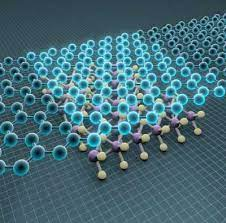

##Geometry

In [98]:
sites= ['a', 'b']
norbs=( ("a",2), ("b",2) )

my_print("**Lattice vectors**")
lat_vec= my.graphene.lat_vec;
for i,lat in enumerate(lat_vec):
  print_eq(r'$ \vec{a}_{%d}=$'%i,lat);

my_print("**Hopping vector**")
hop_v= -(lat_vec[0]+lat_vec[1])/3 ;
hopping_vectors = [ ( 'a', 'b', hop_v) ];
print_eq(r'$\vec{\delta}=$',lat);

**Lattice vectors**

$ \vec{a}_{0}=$ $\left[\begin{matrix}\frac{1}{2} & \frac{\sqrt{3}}{2} & 0\end{matrix}\right]$ 

$ \vec{a}_{1}=$ $\left[\begin{matrix}- \frac{1}{2} & \frac{\sqrt{3}}{2} & 0\end{matrix}\right]$ 

$ \vec{a}_{2}=$ $\left[\begin{matrix}0 & 0 & 1\end{matrix}\right]$ 

**Hopping vector**

$\vec{\delta}=$ $\left[\begin{matrix}0 & 0 & 1\end{matrix}\right]$ 

## Symmetries

In [99]:
my_print("**Rotation matrix**")
R = my.Rz(2*sp.pi/6);
U = np.kron( sigx, qsymm.groups.spin_rotation( [0, 0, 2*np.pi/6], S)).astype(complex);
print_eq(r'$R_6=$',R);
C6 = qsymm.groups.PointGroupElement(R ,U=U )

my_print("**Mirror along $x$**")
R = sp.diag(-1,1,1);
U = np.kron( sig0, sigx ).astype(float)
print_eq(r'$M_x=$',R);
Mx= qsymm.groups.PointGroupElement(R ,U= U )


my_print("**Mirror along $y$**")
R = sp.diag(1,-1,1);
U = np.kron( sigx,sigy).astype(complex)
print_eq(r'$M_y=$',R);
My= qsymm.groups.PointGroupElement(R ,U= U )

my_print("**Mirror along $z$**")
R = sp.diag(1, 1,-1);
U = np.kron( sig0,sigz).astype(float)
print_eq(r'$M_z=$',R);
Mz= qsymm.groups.PointGroupElement(R ,U= U )


my_print("**Inversion Matrix**")
U = np.kron( sigx, sig0).astype(float);
I = qsymm.groups.inversion( realspace_dim= 3, U = U );
print_eq(r'$I=$',sp.Matrix(I.R));

# Fermionic time-reversal
U = np.kron( sig0,-sp.I*sigy ).astype(float);
TR = qsymm.time_reversal( realspace_dim=3, U=U )

**Rotation matrix**

$R_6=$ $\left[\begin{matrix}\frac{1}{2} & - \frac{\sqrt{3}}{2} & 0\\\frac{\sqrt{3}}{2} & \frac{1}{2} & 0\\0 & 0 & 1\end{matrix}\right]$ 

**Mirror along $x$**

$M_x=$ $\left[\begin{matrix}-1 & 0 & 0\\0 & 1 & 0\\0 & 0 & 1\end{matrix}\right]$ 

**Mirror along $y$**

$M_y=$ $\left[\begin{matrix}1 & 0 & 0\\0 & -1 & 0\\0 & 0 & 1\end{matrix}\right]$ 

**Mirror along $z$**

$M_z=$ $\left[\begin{matrix}1 & 0 & 0\\0 & 1 & 0\\0 & 0 & -1\end{matrix}\right]$ 

**Inversion Matrix**

$I=$ $\left[\begin{matrix}-1 & 0 & 0\\0 & -1 & 0\\0 & 0 & -1\end{matrix}\right]$ 

## Symmetry-based model

In [102]:
symmetries = [C6,I,TR];
symmetries = [Mx,My,TR,C6];
E_0,t,lambda_R = sp.symbols(["epsilon_0","t_1", "lambda_R"], positive=True);
family= qsymm.bloch_family(hopping_vectors,symmetries, norbs, momenta=momenta,bloch_model=False);
gmodel =qsymm.hamiltonian_generator.hamiltonian_from_family(family, coeffs=None).subs(*my.euler);
gmodel =qsymm.hamiltonian_generator.hamiltonian_from_family(family, coeffs=[E_0,t,lambda_R]).subs(*my.euler);

my_print("**The tight-binding model**")
print_eq("$H=$",gmodel)

**The tight-binding model**

$H=$ $\left[\begin{matrix}\epsilon_{0} & 0 & t_{1} e^{\frac{i k_{x}}{2}} e^{\frac{\sqrt{3} i k_{y}}{6}} + t_{1} e^{- \frac{\sqrt{3} i k_{y}}{3}} + t_{1} e^{- \frac{i k_{x}}{2}} e^{\frac{\sqrt{3} i k_{y}}{6}} & \lambda_{R} \left(\frac{\sqrt{3}}{2} - \frac{i}{2}\right) e^{\frac{i k_{x}}{2}} e^{\frac{\sqrt{3} i k_{y}}{6}} + i \lambda_{R} e^{- \frac{\sqrt{3} i k_{y}}{3}} + \lambda_{R} \left(- \frac{\sqrt{3}}{2} - \frac{i}{2}\right) e^{- \frac{i k_{x}}{2}} e^{\frac{\sqrt{3} i k_{y}}{6}}\\0 & \epsilon_{0} & \lambda_{R} \left(- \frac{\sqrt{3}}{2} - \frac{i}{2}\right) e^{\frac{i k_{x}}{2}} e^{\frac{\sqrt{3} i k_{y}}{6}} + i \lambda_{R} e^{- \frac{\sqrt{3} i k_{y}}{3}} + \lambda_{R} \left(\frac{\sqrt{3}}{2} - \frac{i}{2}\right) e^{- \frac{i k_{x}}{2}} e^{\frac{\sqrt{3} i k_{y}}{6}} & t_{1} e^{\frac{i k_{x}}{2}} e^{\frac{\sqrt{3} i k_{y}}{6}} + t_{1} e^{- \frac{\sqrt{3} i k_{y}}{3}} + t_{1} e^{- \frac{i k_{x}}{2}} e^{\frac{\sqrt{3} i k_{y}}{6}}\\t_{1} e^{\frac{i k_{x}}{2}} e^{- \frac{\sqrt{3} i k_{y}}{6}} + t_{1} e^{\frac{\sqrt{3} i k_{y}}{3}} + t_{1} e^{- \frac{i k_{x}}{2}} e^{- \frac{\sqrt{3} i k_{y}}{6}} & \lambda_{R} \left(\frac{\sqrt{3}}{2} + \frac{i}{2}\right) e^{\frac{i k_{x}}{2}} e^{- \frac{\sqrt{3} i k_{y}}{6}} - i \lambda_{R} e^{\frac{\sqrt{3} i k_{y}}{3}} + \lambda_{R} \left(- \frac{\sqrt{3}}{2} + \frac{i}{2}\right) e^{- \frac{i k_{x}}{2}} e^{- \frac{\sqrt{3} i k_{y}}{6}} & \epsilon_{0} & 0\\\lambda_{R} \left(- \frac{\sqrt{3}}{2} + \frac{i}{2}\right) e^{\frac{i k_{x}}{2}} e^{- \frac{\sqrt{3} i k_{y}}{6}} - i \lambda_{R} e^{\frac{\sqrt{3} i k_{y}}{3}} + \lambda_{R} \left(\frac{\sqrt{3}}{2} + \frac{i}{2}\right) e^{- \frac{i k_{x}}{2}} e^{- \frac{\sqrt{3} i k_{y}}{6}} & t_{1} e^{\frac{i k_{x}}{2}} e^{- \frac{\sqrt{3} i k_{y}}{6}} + t_{1} e^{\frac{\sqrt{3} i k_{y}}{3}} + t_{1} e^{- \frac{i k_{x}}{2}} e^{- \frac{\sqrt{3} i k_{y}}{6}} & 0 & \epsilon_{0}\end{matrix}\right]$ 

##The low-energy $(\vec{k}\cdot\vec{p})$ Hamiltonian

In [105]:
my_print(r" Replace $\varepsilon_0\rightarrow 0$ and Replace $t_2\rightarrow 0$")
H = gmodel.subs(E_0,0).subs(t_2,0);

my_print(r"Replace $t\rightarrow 2v/\sqrt{3} $ ")
v, Delta= sp.symbols("v Delta", positive=True);
H = H.subs(t,2*v/sp.sqrt(3)).subs(E_0,0);

my_print(r"**Low energy Hamiltonians**")
for sK, K in zip( (r"$\vec{K}_0$",r"$\vec{K}_1$"),
                  (my.graphene.K0,my.graphene.K1)):
  kpH = my.FirstOrderTaylor( H, x=momenta, x0=K  );
  print_eq(sK+"=", sp.Array(K) )
  print_eq(r"$H(\vec{k})=$", kpH );

 Replace $\varepsilon_0\rightarrow 0$ and Replace $t_2\rightarrow 0$

Replace $t\rightarrow 2v/\sqrt{3} $ 

**Low energy Hamiltonians**

$\vec{K}_0$= $\left[\begin{matrix}\frac{4 \pi}{3} & 0 & 0\end{matrix}\right]$ 

$H(\vec{k})=$ $\left[\begin{matrix}0 & 0 & v \left(- k_{x} - i k_{y}\right) & 3 i \lambda_{R}\\0 & 0 & \frac{\sqrt{3} \lambda_{R} \left(i k_{x} + k_{y}\right)}{2} & v \left(- k_{x} - i k_{y}\right)\\v \left(- k_{x} + i k_{y}\right) & \frac{\sqrt{3} \lambda_{R} \left(- i k_{x} + k_{y}\right)}{2} & 0 & 0\\- 3 i \lambda_{R} & v \left(- k_{x} + i k_{y}\right) & 0 & 0\end{matrix}\right]$ 

$\vec{K}_1$= $\left[\begin{matrix}- \frac{4 \pi}{3} & 0 & 0\end{matrix}\right]$ 

$H(\vec{k})=$ $\left[\begin{matrix}0 & 0 & v \left(k_{x} - i k_{y}\right) & \frac{\sqrt{3} \lambda_{R} \left(- i k_{x} + k_{y}\right)}{2}\\0 & 0 & 3 i \lambda_{R} & v \left(k_{x} - i k_{y}\right)\\v \left(k_{x} + i k_{y}\right) & - 3 i \lambda_{R} & 0 & 0\\\frac{\sqrt{3} \lambda_{R} \left(i k_{x} + k_{y}\right)}{2} & v \left(k_{x} + i k_{y}\right) & 0 & 0\end{matrix}\right]$ 

In [106]:
from sympy.physics.quantum import TensorProduct
(kronProd(sigx,sigy)+kronProd(sigy,sigx)) *lambda_R*sp.sqrt(3)/2

Matrix([
[                 0, 0, 0, -sqrt(3)*I*lambda_R],
[                 0, 0, 0,                   0],
[                 0, 0, 0,                   0],
[sqrt(3)*I*lambda_R, 0, 0,                   0]])

### Task: Express the hamiltonian as a linear combination of $k$, $\sigma$, and $s$. i.e :  $\lambda_R \sqrt{3}(\sigma_x s_y + \sigma_y s_x)/2$